# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

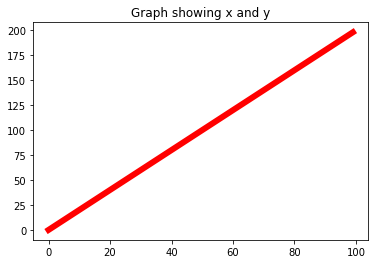

In [3]:
# Method 1
plt.plot(x, y, color='red', linewidth=6)
plt.title('Graph showing x and y')
plt.show()

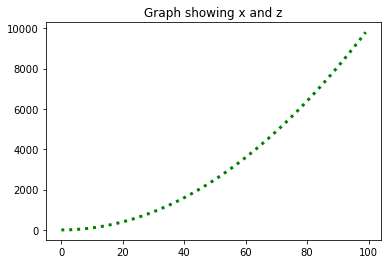

In [4]:
# Method 1
plt.plot(x, z, color='green', linewidth=3, linestyle=':')
plt.title('Graph showing x and z')
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

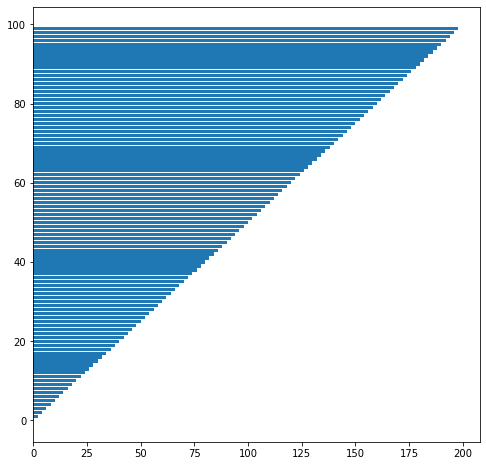

In [5]:
x_axis = x
y_axis = y

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,8))
ax.barh(x_axis, y_axis);

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

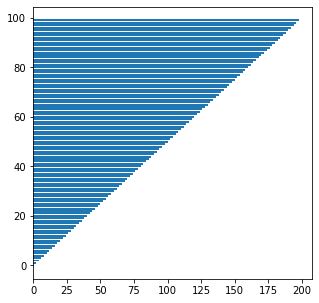

In [6]:
# your code here
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5))
ax.barh(x_axis, y_axis);

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

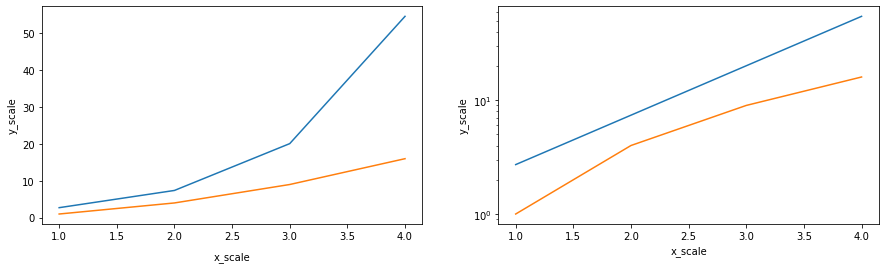

In [7]:
# your code here
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
x = np.arange(1,5)
axes[0].plot( x, np.exp(x))
axes[0].plot(x,x**2)
axes[1].plot (x, np.exp(x))
axes[1].plot(x, x**2)
axes[1].set_yscale("log")
axes[0].set_xlabel("x_scale")
axes[0].set_ylabel("y_scale")
axes[0].xaxis.labelpad = 10
axes[1].set_xlabel("x_scale")
axes[1].set_ylabel("y_scale")
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

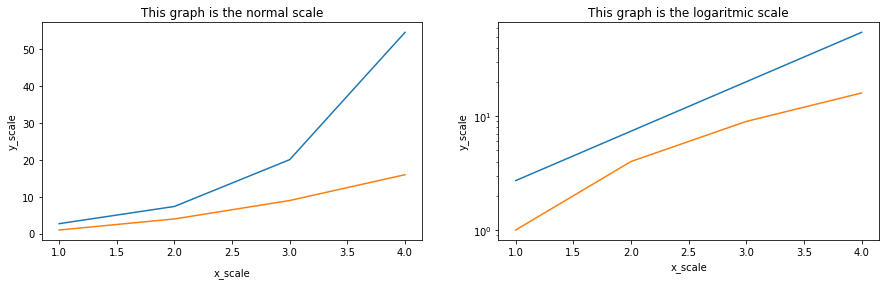

In [8]:
# your code here
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
x = np.arange(1,5)
axes[0].plot( x, np.exp(x))
axes[0].plot(x,x**2)
axes[0].set_title("This graph is the normal scale")
axes[1].plot (x, np.exp(x))
axes[1].plot(x, x**2)
axes[1].set_yscale("log")
axes[1].set_title("This graph is the logaritmic scale")
axes[0].set_xlabel("x_scale")
axes[0].set_ylabel("y_scale")
axes[0].xaxis.labelpad = 10
axes[1].set_xlabel("x_scale")
axes[1].set_ylabel("y_scale")
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
# your code here
fitbit = pd.read_csv('/home/sandra/Downloads/fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [10]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [36]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

fitbit_month_select = fitbit[['Months_encoded', 'Steps']]
fitbit_month_select.head()

,Months_encoded,Steps
0,5,905
1,5,18925
2,5,14228
3,5,6756
4,5,502


In [37]:
monthly_median = fitbit.groupby('Months_encoded')['Steps'].median().to_frame().reset_index()
monthly_median

,Months_encoded,Steps
0,1,10366.0
1,2,9235.0
2,3,11122.0
3,4,13846.5
4,5,11998.0
5,6,12935.5
6,7,10644.0
7,8,12213.0
8,9,9343.0
9,10,7865.0


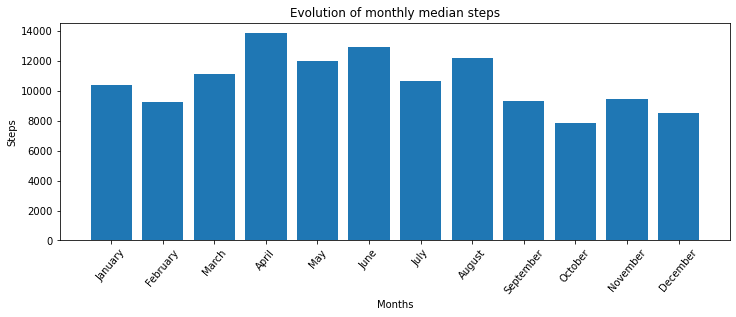

<Figure size 864x288 with 0 Axes>

In [112]:
monthly_median_steps = fitbit[['Months_encoded','Months','Steps']].groupby('Months').median().reset_index().sort_values(by=['Months_encoded'])

steps = monthly_median_steps['Steps']
months = monthly_median_steps['Months']
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))
axes.bar(months,steps)
plt.title('Evolution of monthly median steps')
labels = axes.get_xticklabels()
plt.xlabel('Months')
plt.ylabel('Steps')
plt.setp(labels, rotation='50')
plt.show();

plt.savefig('./figures/monthly_median_steps.png',
            orientation='landscape',
            transparent=False)

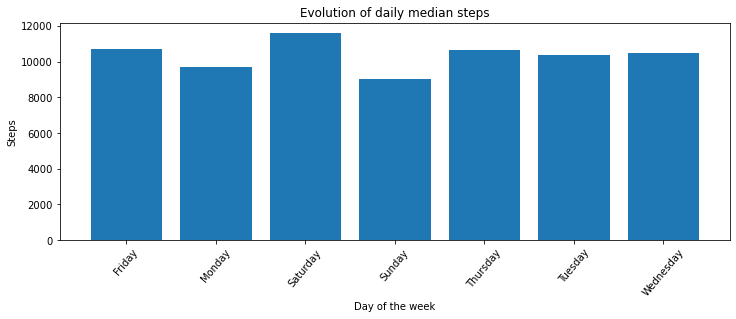

<Figure size 864x288 with 0 Axes>

In [116]:
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

day_median = fitbit[['Days','Steps']].groupby('Days').median().reset_index().sort_values(by=['Days'])

steps = day_median['Steps']
months = day_median['Days']
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))
axes.bar(months,steps)
plt.title('Evolution of daily median steps')
labels = axes.get_xticklabels()
plt.xlabel('Day of the week')
plt.ylabel('Steps')
plt.setp(labels, rotation='50')
plt.show();

plt.savefig('./figures/median_steps_per_day.png',
            orientation='landscape',
            transparent=False)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

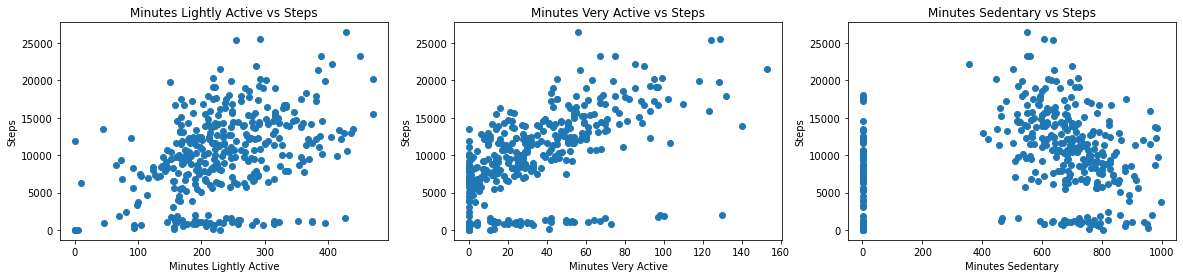

In [118]:
# your code here

mla_steps = fitbit[['Minutes Lightly Active','Steps']]
mva_steps = fitbit[['Minutes Very Active','Steps']]
ms_steps = fitbit[['Minutes Sedentary','Steps']]

plot_loop = [mla_steps, mva_steps, ms_steps]

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 4))
for y, x in enumerate(plot_loop): 
    axes[y].scatter(x.iloc[:,0],x.iloc[:,1])
    axes[y].set_title(x.columns[0]+' vs '+x.columns[1])
    axes[y].set_xlabel(x.columns[0])
    axes[y].set_ylabel(x.columns[1])

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [14]:
# your code here
titanic = pd.read_csv('/home/sandra/Downloads/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [16]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [ ]:
# NUMERICAL VARIABLES
# your code here


In [ ]:
# CATEGORICAL VARIABLES
# your code here


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [ ]:
# your code here


#### Use the right visulalization to show the distribution of column `Age`.

In [ ]:
# your code here


#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [ ]:
# your code here


#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
"""

#### Use seaborn to show the distribution of column `Age`.

In [ ]:
# your code here


#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Use the right plot to visualize the column `Pclass`.

In [ ]:
# your code here


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here


In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here